## Importing the data

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Flatten
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()



### Converting the data into usable formate

In [2]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
# .shape[0] shows rows and .shape[1] shows columns
y_train = to_categorical(y_train)
# to_catagorial will transform numbers into proper Vectors (Array)

x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
y_test = to_categorical(y_test)

### Creating the Network
### Networking the Network

In [3]:

def myModel():

    # Training a Neural Network Using Machine Learning Library


    # Required Variables for Model

    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3,3)
    sizeOfPool = (2,2)
    noOfNodes = 784

    #Creating model with No Layers
    model = Sequential()
    
    #Creating 1st Layer
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(28,28,1),activation='sigmoid')))

    #Adds Further Layers...
    model.add((Conv2D(noOfFilters,sizeOfFilter1,activation='sigmoid')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='sigmoid')))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='sigmoid')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5)) # Scale the values by (1/0.5)
    model.add(Flatten())
    model.add(Dense(noOfNodes,activation='sigmoid'))
    model.add(Dropout(0.5))

    model.add(Dense(10,activation = 'softmax'))
    opt = tf.keras.optimizers.Adam(learning_rate = 0.001) #Adam optimization is a stochastic gradient descent method
    model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])

    return model

model = myModel()

# Epochs suggest number of runs over training data
model.fit(x_train[:5000],y_train[:5000],epochs=4)

Epoch 1/4
157/157 [==============================] - 16s 98ms/step - loss: 2.3440 - accuracy: 0.1742
Epoch 2/4
157/157 [==============================] - 15s 96ms/step - loss: 0.7087 - accuracy: 0.7932
Epoch 3/4
157/157 [==============================] - 16s 100ms/step - loss: 0.3801 - accuracy: 0.8872
Epoch 4/4
157/157 [==============================] - 18s 118ms/step - loss: 0.2890 - accuracy: 0.9146


### Checking the Accuracy

In [4]:
model.evaluate(x_test[:5000],y_test[:5000])

157/157 [==============================] - 4s 25ms/step - loss: 0.2877 - accuracy: 0.9090


[0.28766849637031555, 0.9089999794960022]

## Calling predict() function

In [5]:

def sayNum(n):
    prediction = model.predict(x_test[n:n+1])
    for i in prediction:
        MaxPosition=np.argmax(i)
        print("The predicted value is : ",MaxPosition)

def printImg(n):
     (plt.imshow(x_test[n]))


# Output

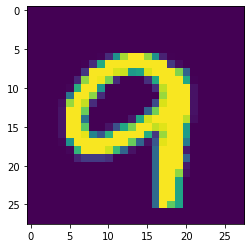

In [9]:
x=int(input("Enter Random number: "))
printImg(x)


In [10]:
sayNum(x)

The predicted value is :  9
